In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import statistics

In [4]:
df = pd.read_csv('all_team_stats.csv')
df.head()

,TeamName,WinRate,TeamAutoLower,TeamAutoUpper,TeamTeleopLower,TeamTeleopUpper,HangScore,HighestCompLevel
0,frc384,0.741379,0.758621,2.241379,1.724138,11.896552,6.034483,5
1,frc6802,0.555556,1.592593,1.037037,7.666667,4.296296,3.481481,5
2,frc617,0.300000,1.050000,1.400000,4.950000,5.750000,0.000000,0
3,frc346,0.340000,0.560000,1.120000,2.400000,4.840000,8.400000,3
4,frc401,0.634615,0.230769,2.653846,2.769231,12.730769,6.692308,5


<AxesSubplot:>

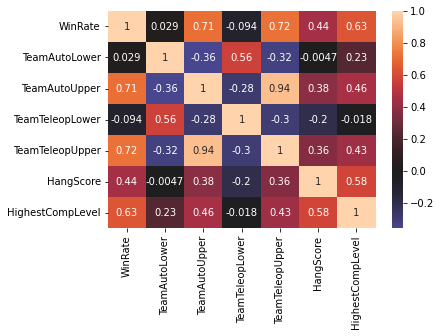

In [7]:
sns.heatmap(df.corr(), center = 0.0, annot=True)


In [20]:
# processing match data

event_keys = [
  "2022va305",
  '2022va306',
  '2022va319',
  "2022va320",
]

header = {'X-TBA-Auth-Key': 'j5psodzpSE2HyqjKqVQUfC35jmvDo8Cb0YFHZN6ky76Arm4rQ7H2xD370QSwEmsC'}


data_list = []
for event in event_keys:
  source = requests.get(f'https://www.thebluealliance.com/api/v3/event/{event}/matches', header).text
  data_list.append(pd.read_json(source))
  time.sleep(1)

In [54]:
data_test = data_list[0]

# convention will be red - blue

# team list
def team_lookup_averages(team_list, df_teams):
    team_winrate_list = []
    team_auto_lower_list = []
    team_auto_upper_list = []
    team_teleop_lower_list = []
    team_teleop_upper_list = []
    team_hang_score_list = []
    team_highest_comp_level_list = []
    
    for team in team_list:
        team_winrate_list.append(float(df_teams.loc[df_teams['TeamName'] == team]['WinRate']))
        team_auto_lower_list.append(float(df_teams.loc[df_teams['TeamName'] == team]['TeamAutoLower']))
        team_auto_upper_list.append(float(df_teams.loc[df_teams['TeamName'] == team]['TeamAutoUpper']))
        team_teleop_lower_list.append(float(df_teams.loc[df_teams['TeamName'] == team]['TeamTeleopLower']))
        team_teleop_upper_list.append(float(df_teams.loc[df_teams['TeamName'] == team]['TeamTeleopUpper']))
        team_hang_score_list.append(float(df_teams.loc[df_teams['TeamName'] == team]['HangScore']))
        team_highest_comp_level_list.append(float(df_teams.loc[df_teams['TeamName'] == team]['HighestCompLevel']))
    
    return pd.Series({'AvgWinrate': statistics.mean(team_winrate_list),
                        'AvgAutoLower': statistics.mean(team_auto_lower_list),
                        'AvgAutoUpper': statistics.mean(team_auto_upper_list),
                        'AvgTeleopLower': statistics.mean(team_teleop_lower_list),
                        'AvgTelopUpper': statistics.mean(team_teleop_upper_list),
                        'AvgHangScore': statistics.mean(team_hang_score_list),
                        'AvgHighestCompLevel': statistics.mean(team_highest_comp_level_list)
                        })


In [28]:
# returns dataframe with the teams 
def get_teams(df):
    red_teams_list = []
    blue_teams_list = []
    for i in range(df.shape[0]):
        red_teams_list.append(df.iloc[i]['alliances']['red']['team_keys'])
        blue_teams_list.append(df.iloc[i]['alliances']['blue']['team_keys'])
    return pd.DataFrame({'Red': red_teams_list, 'Blue': blue_teams_list})
    
    

In [44]:
data_test.iloc[0]['alliances']

get_teams(data_test)

,Red,Blue
0,"[frc5724, frc2363, frc3136]","[frc1262, frc5804, frc1610]"
1,"[frc5724, frc2363, frc3136]","[frc1262, frc5804, frc1610]"
2,"[frc977, frc1262, frc6194]","[frc5724, frc1610, frc5546]"
3,"[frc6802, frc422, frc2106]","[frc6194, frc977, frc540]"
4,"[frc1262, frc617, frc1908]","[frc2890, frc5724, frc4286]"
5,"[frc1610, frc5546, frc5804]","[frc3136, frc2363, frc401]"
6,"[frc1262, frc617, frc2106]","[frc6802, frc6194, frc2890]"
7,"[frc2363, frc422, frc1908]","[frc1610, frc3136, frc540]"
8,"[frc5724, frc5546, frc977]","[frc4286, frc401, frc5804]"
9,"[frc6802, frc3136, frc5804]","[frc6194, frc1262, frc2363]"


In [66]:
def get_team_averages(team_list_df, df_team_info):
    series_list = []
    for i in range(team_list_df.shape[0]):
        team_info_red = team_lookup_averages(team_list_df.iloc[i]['Red'], df_team_info).rename('Red Averages')
        team_info_blue = team_lookup_averages(team_list_df.iloc[i]['Blue'], df_team_info).rename('Blue Averages')
        series_list.append(team_info_red - team_info_blue)
    
    return pd.DataFrame(series_list)

team_data = get_teams(data_test)

processed_df = get_team_averages(team_data, df)

processed_df['Winner'] = data_test['winning_alliance'].map({'red': 1, '': 0, 'blue':-1})


<AxesSubplot:>

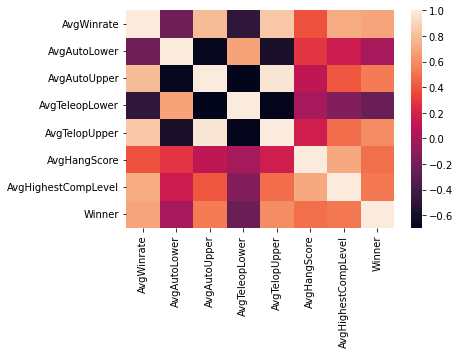

In [68]:
sns.heatmap(processed_df.corr())